```markdown
# 관련 라이브러리 import
```

In [1]:
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

```markdown
# 데이터 가져오기
```

In [2]:
# 데이터 가져오기
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print(train.shape, test.shape)

(15035, 21) (6468, 20)


```markdown
# 훈련 데이터 살펴보기
```

In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


```markdown
# 결측치의 유무를 확인
```

In [4]:
 train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

```markdown
# train 데이터의 date 칼럼에서 년도와 날짜만 추출
```

In [5]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


```markdown
# 타겟 칼럼인 price를 y에 저장 후 train에 있던 price 칼럼 삭제.
```

In [6]:
y = train['price']
del train['price'] 
print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


```markdown
# 불필요한 id 칼럼은 제거
```

In [7]:
# 
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


```markdown
# 위 과정을 test 데이터에도 적용
```

In [8]:

test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']
test.head()
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


## 데이터 시각화  
1. 각각의 데이터를 살펴보자.
2. y값을 로그변환하여 정규 분포 모양을 갖도록 하자.

```markdown
# train 데이터의 정보 확인
```

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

```markdown
# train 데이터의 각 특성별 분포 확인
```

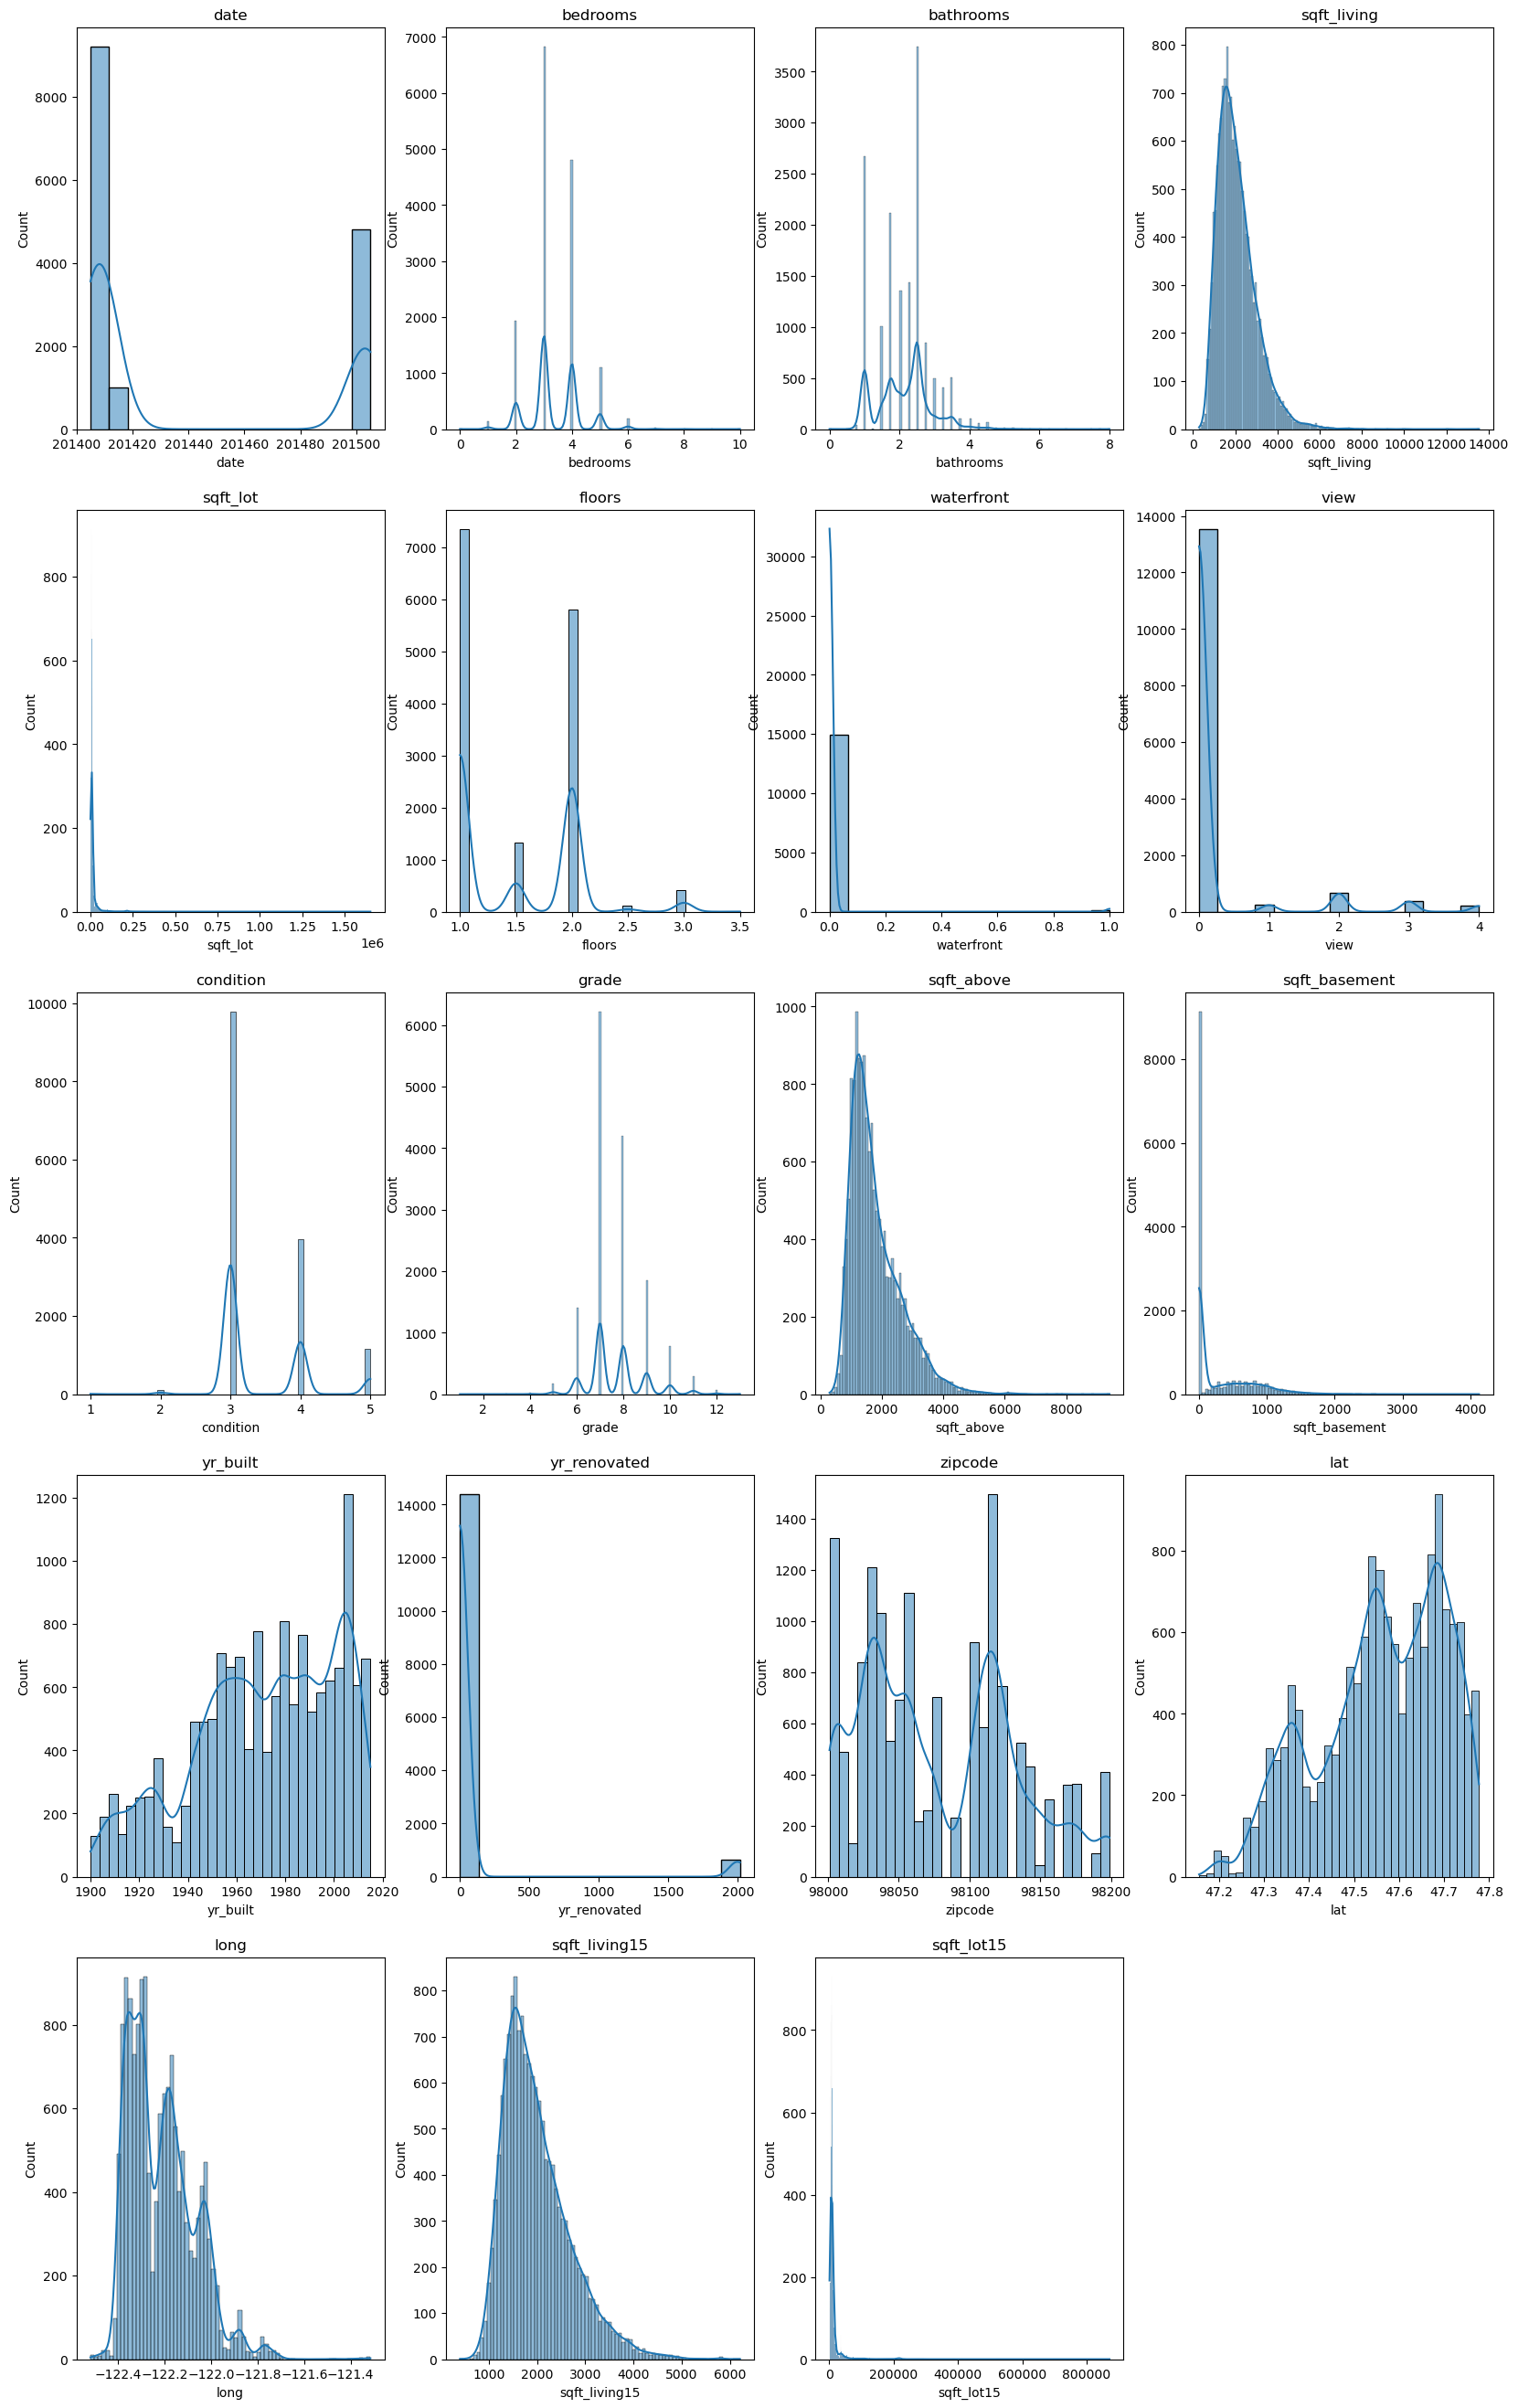

In [10]:
plt.figure(figsize=(20, 40))

columns = train.columns
for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.histplot(train[columns[i]], kde=True)
    plt.title(columns[i])

```markdown
# 데이터의 특성 별 상관관계 확인
```

<Axes: >

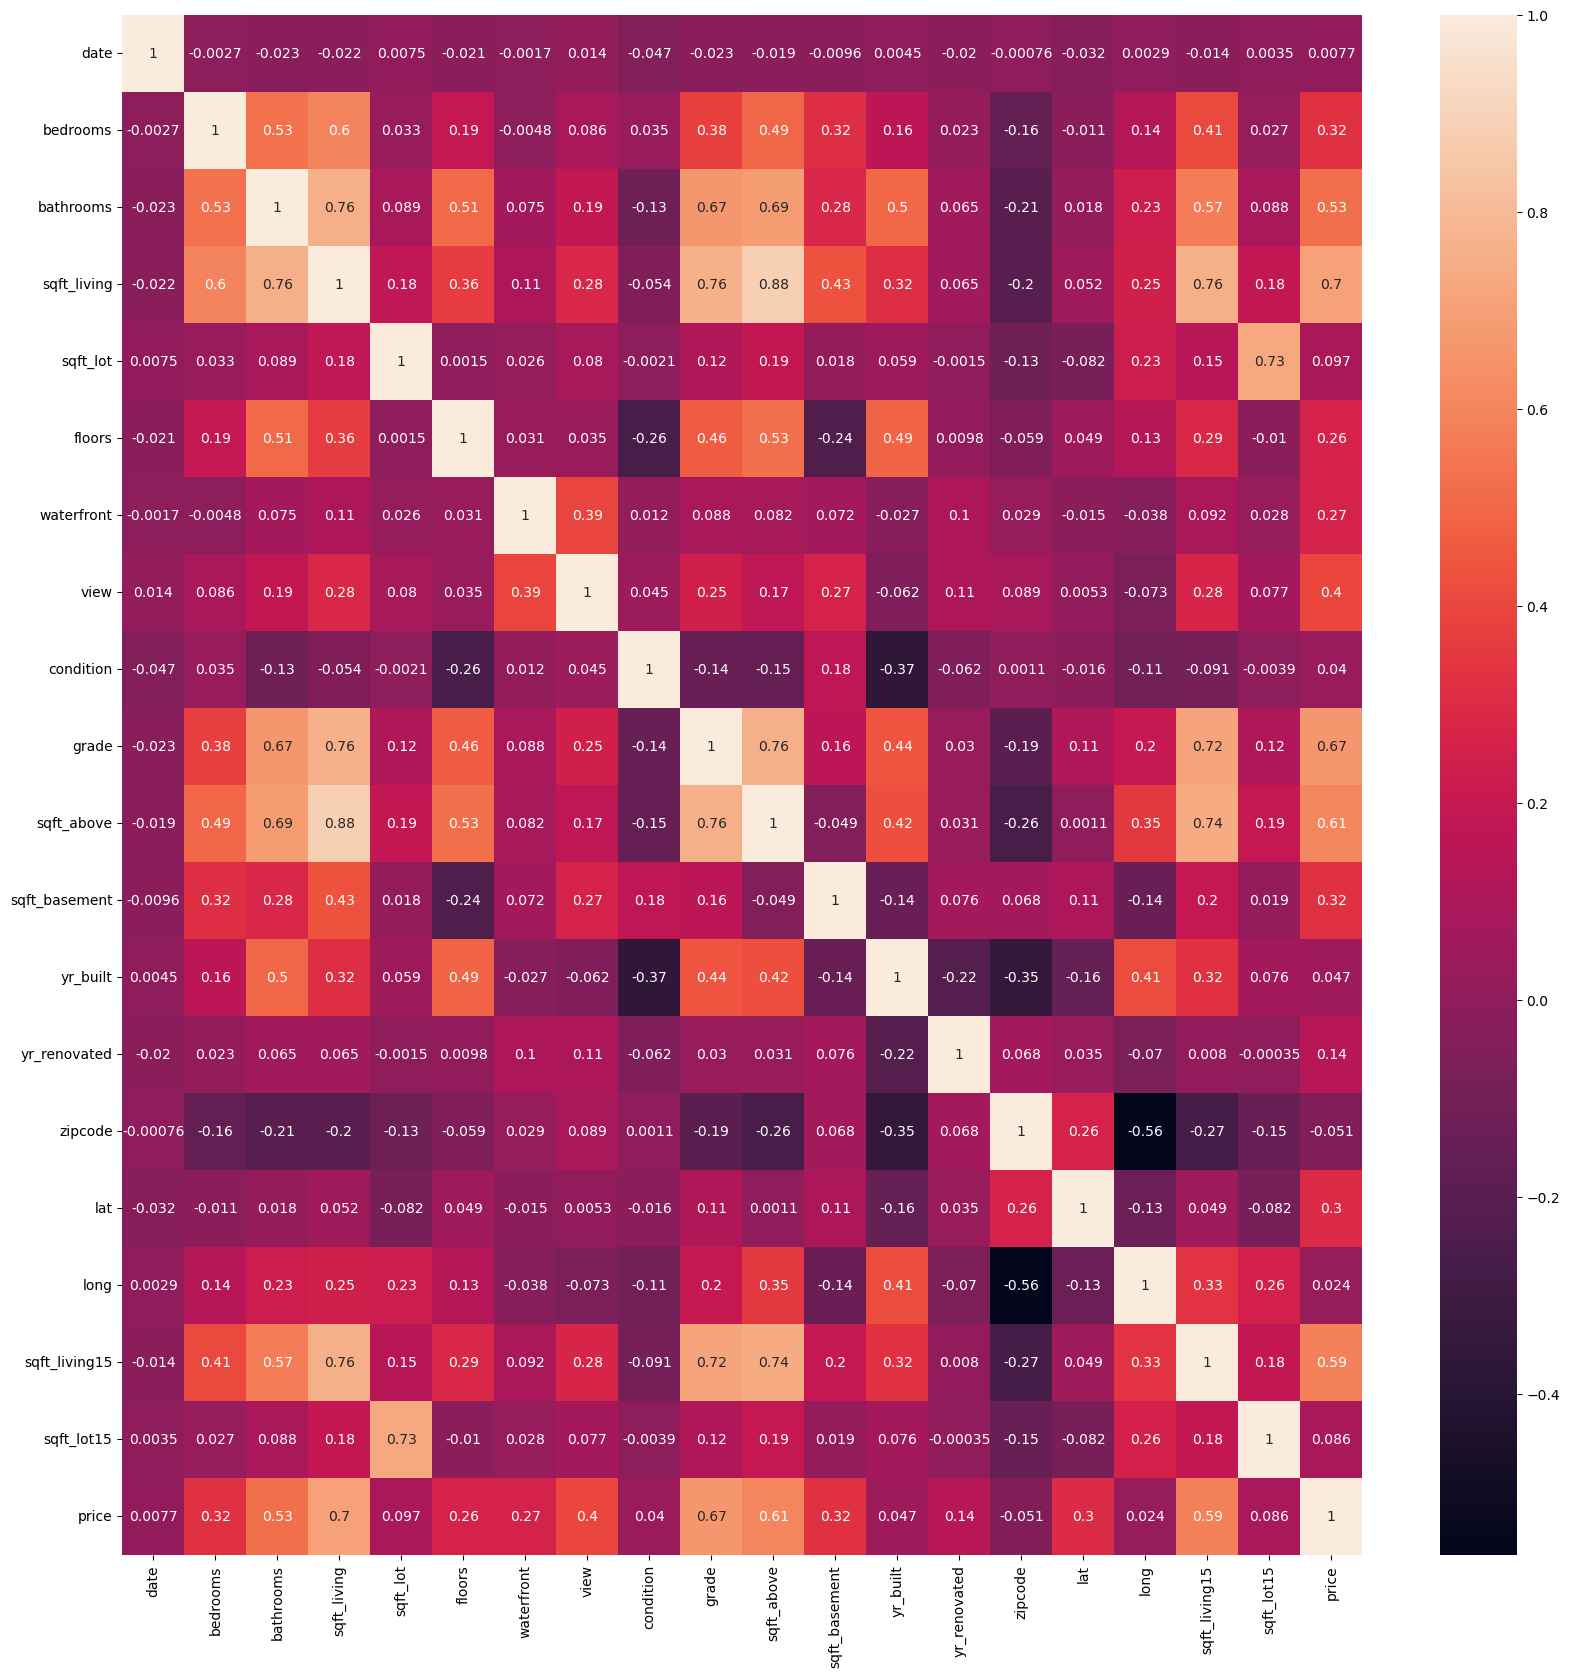

In [11]:
corr = pd.concat([train, y],axis=1).corr() # 각 특성과 price를 살펴보자.
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

```markdown
# y 값 확인
```

In [12]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

```markdown
# y값 분포 확인
```

<Axes: xlabel='price', ylabel='Count'>

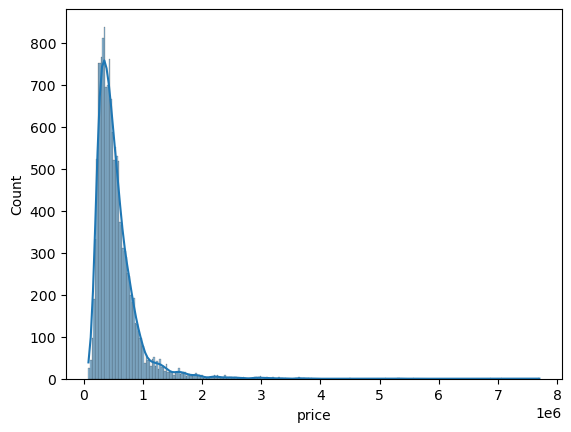

In [13]:
sns.histplot(y, kde=True)

```markdown
# y값을 log 변환을 통해 정규분포로 변환
  - y값을 로그변환을 했기 때문에, 모델 학습 후 예측 시 exp변환을 해주어야 한다.
```

In [14]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

```markdown
# y값 log 변환 후의 y값 분포 살펴보기
```

<Axes: xlabel='price', ylabel='Density'>

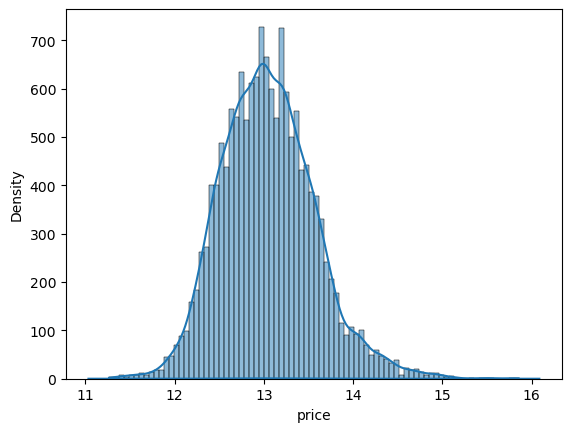

In [15]:
sns.kdeplot(y)
sns.histplot(y, kde=True)

## 경도, 위도, zipcode 분석하기  
loss를 줄이기 위해서는 'lat', 'long', 'zipcode' 이 세 특성을 통해서 새로운 특성을 만들어야할 필요가 있다.
- lat, long, zipcode, y값만 추출
- 경도, 위도별 집값 확인
- 경도, 위도별 우편번호 확인

<Axes: xlabel='long', ylabel='lat'>

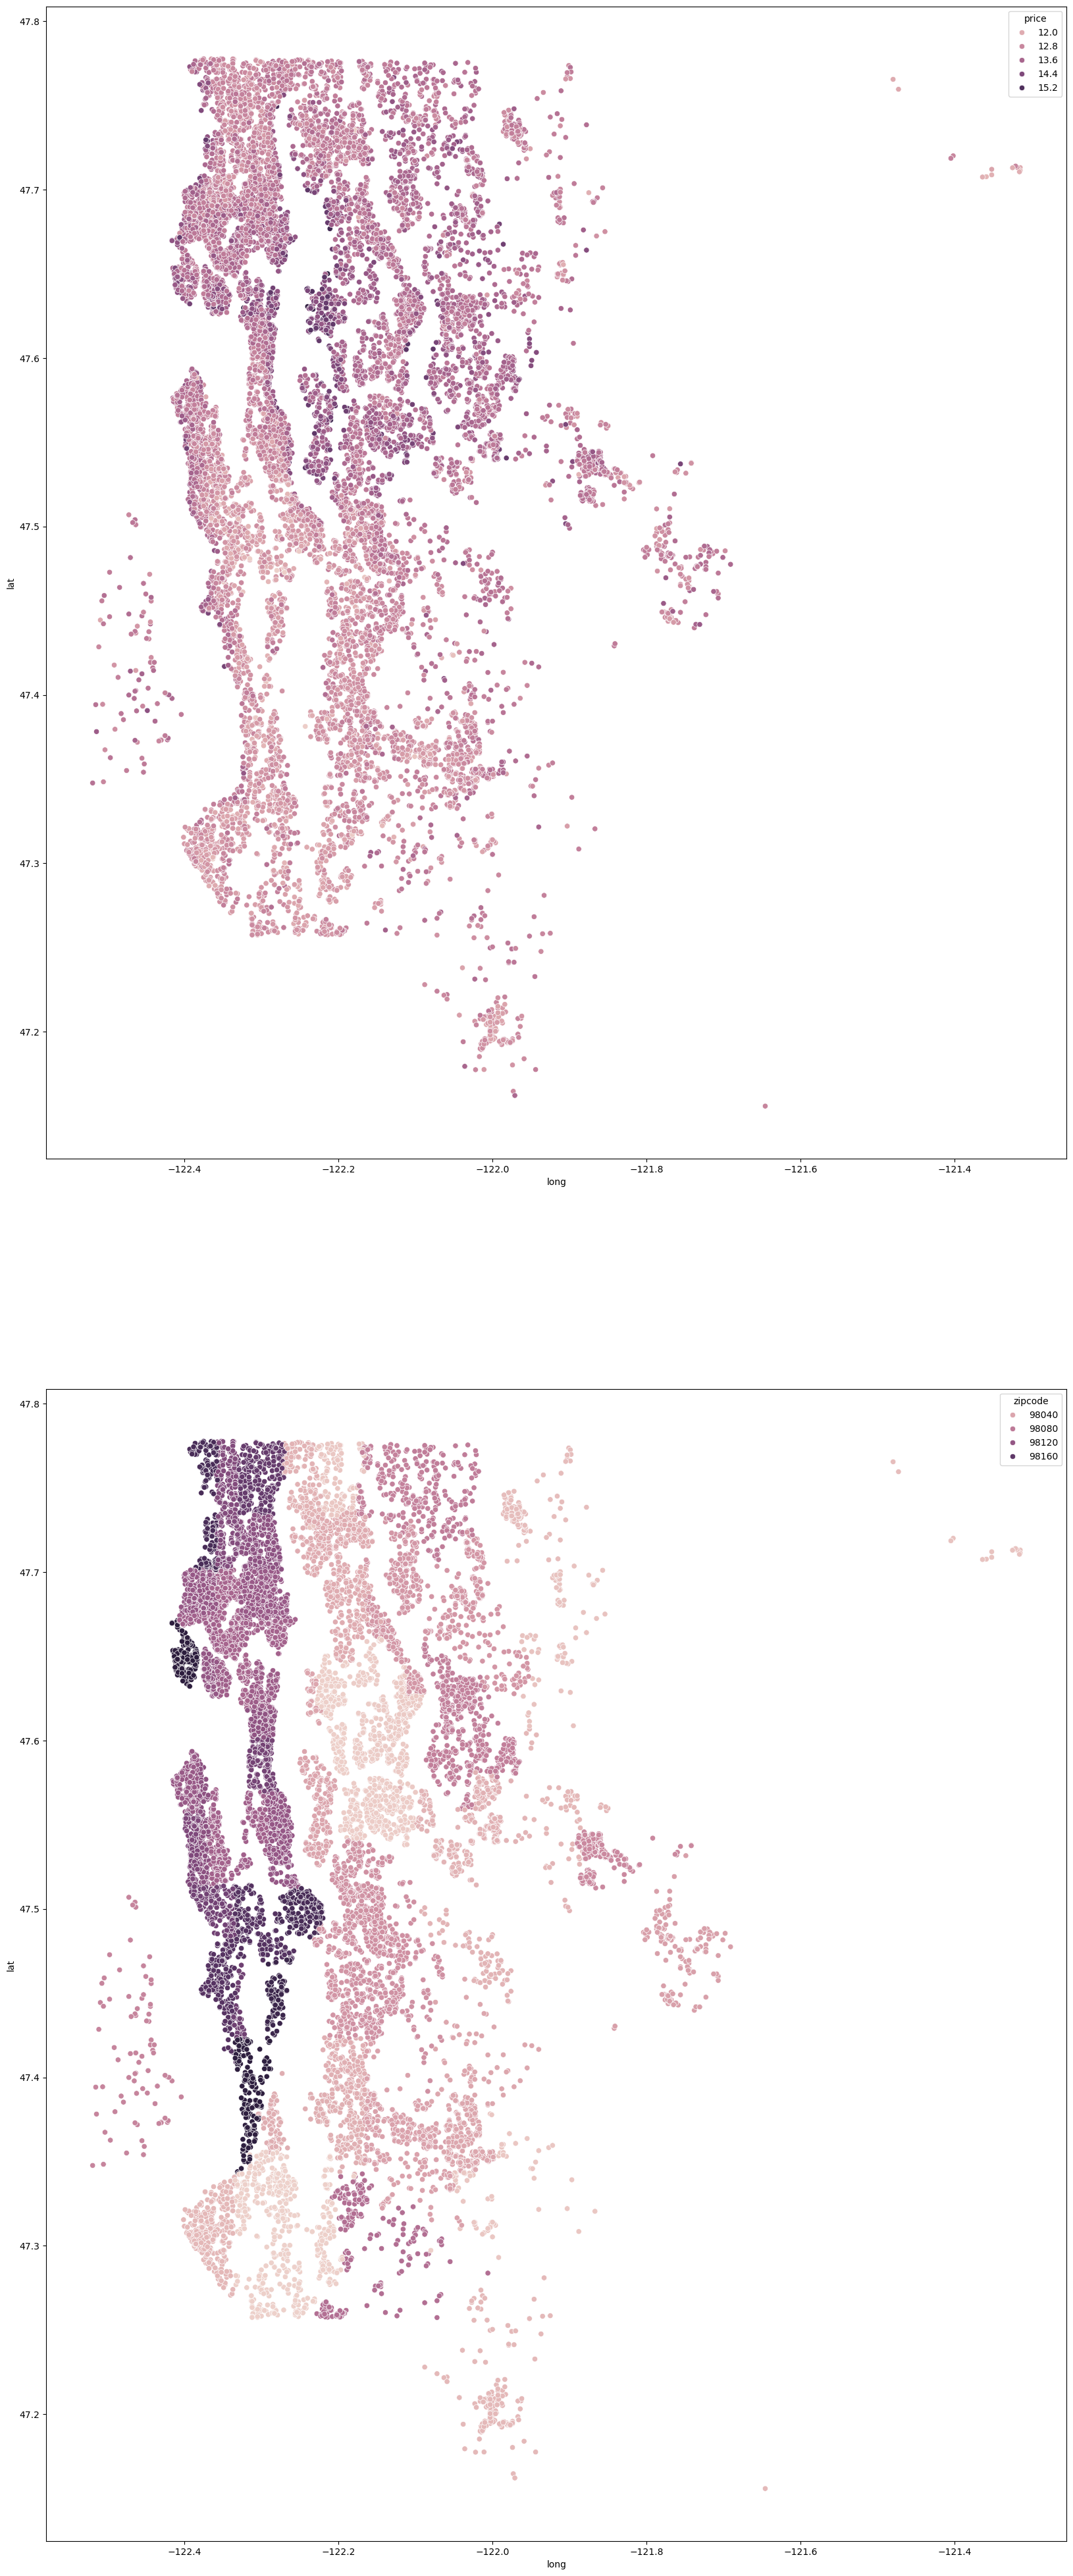

In [16]:
train_loc_price = pd.concat([train[['lat', 'long', 'zipcode']], y], axis=1) 
train_loc_price


plt.figure(figsize=(20, 50))
plt.subplot(2, 1, 1)
sns.scatterplot(data=train_loc_price, x='long', y='lat', hue='price')
plt.subplot(2, 1, 2)
sns.scatterplot(data=train_loc_price, x='long', y='lat', hue='zipcode')

```markdown
# 위치 정보와 집 값 상관 관계 확인
```

<Axes: >

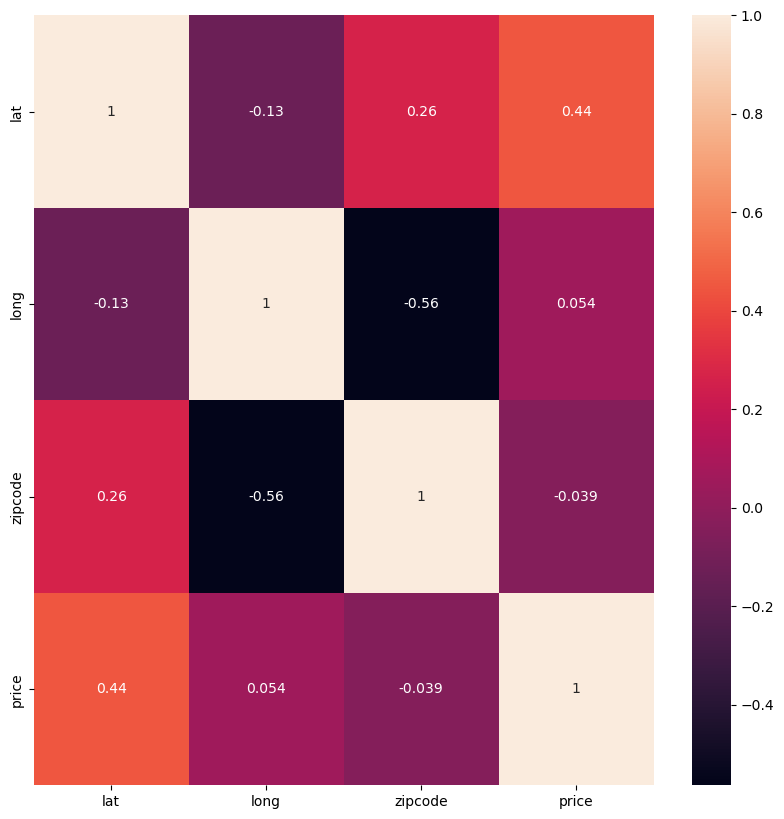

In [17]:
corr = train_loc_price.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

## 도시 정보 추가하기
```markdown
# 우편번호 추가 함수
 - zipcode 칼럼의 값은, 미국 WA 주의 King County지역의 zipcode
 - zipcode 값을 해당 도시 이름으로 매핑
```


In [18]:
def zipcode_to_city(zipcode):
    # 우편번호별 지역 이름
    matcher = {98001: 'Auburn',
    98002: 'Auburn',
    98003: 'Federal Way',
    98004: 'Bellevue',
    98005: 'Bellevue',
    98006: 'Bellevue',
    98007: 'Bellevue',
    98008: 'Bellevue',
    98010: 'Black Diamond',
    98011: 'Bothell',
    98014: 'Carnation',
    98019: 'Duvall',
    98022: 'Enumclaw',
    98023: 'Federal Way',
    98024: 'Fall City',
    98027: 'Issaquah',
    98028: 'Kenmore',
    98029: 'Issaquah',
    98030: 'Kent',
    98031: 'Kent',
    98032: 'Kent',
    98033: 'Kirkland',
    98034: 'Kirkland',
    98038: 'Maple Valley',
    98039: 'Medina',
    98040: 'Mercer Island',
    98042: 'Kent',
    98045: 'North Bend',
    98052: 'Redmond',
    98053: 'Redmond',
    98055: 'Renton',
    98056: 'Renton',
    98058: 'Renton',
    98059: 'Renton',
    98065: 'Snoqualmie',
    98070: 'Vashon',
    98072: 'Woodinville',
    98074: 'Sammamish',
    98075: 'Sammamish',
    98077: 'Woodinville',
    98092: 'Auburn',
    98102: 'Seattle',
    98103: 'Seattle',
    98105: 'Seattle',
    98106: 'Seattle',
    98107: 'Seattle',
    98108: 'Seattle',
    98109: 'Seattle',
    98112: 'Seattle',
    98115: 'Seattle',
    98116: 'Seattle',
    98117: 'Seattle',
    98118: 'Seattle',
    98119: 'Seattle',
    98122: 'Seattle',
    98125: 'Seattle',
    98126: 'Seattle',
    98133: 'Seattle',
    98136: 'Seattle',
    98144: 'Seattle',
    98146: 'Seattle',
    98148: 'Seattle',
    98155: 'Seattle',
    98166: 'Seattle',
    98168: 'Seattle',
    98177: 'Seattle',
    98178: 'Seattle',
    98188: 'Seattle',
    98198: 'Seattle',
    98199: 'Seattle'
    }
    return matcher[zipcode]

```markdown
# train 데이터에 도시 칼럼을 추가
```

In [19]:
train['city'] = train['zipcode'].map(zipcode_to_city)
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Federal Way
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,Renton
15031,201503,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,Seattle
15032,201405,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
15033,201502,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle


```markdown
# test 데이터에 도시 칼럼을 추가
```

In [20]:
test['city'] = test['zipcode'].map(zipcode_to_city)
test

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Redmond
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Seattle
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Maple Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,201406,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303,Black Diamond
6464,201501,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,Seattle
6465,201502,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,Seattle
6466,201406,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle


```markdown
# 도시명 카테고리 만들기
  - 도시 이름은 string이기 때문에 tree 기반 모델의 학습을 위해
  - string을 int로 label
  - int를 카테고리로 변경
```

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_city_labeled = le.fit_transform(train['city'])
test_city_labeled = le.transform(test['city'])

train['city'] = train_city_labeled
test['city'] = test_city_labeled

train['city'] = train['city'].astype('category')
test['city'] = test['city'].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           15035 non-null  int64   
 1   bedrooms       15035 non-null  int64   
 2   bathrooms      15035 non-null  float64 
 3   sqft_living    15035 non-null  int64   
 4   sqft_lot       15035 non-null  int64   
 5   floors         15035 non-null  float64 
 6   waterfront     15035 non-null  int64   
 7   view           15035 non-null  int64   
 8   condition      15035 non-null  int64   
 9   grade          15035 non-null  int64   
 10  sqft_above     15035 non-null  int64   
 11  sqft_basement  15035 non-null  int64   
 12  yr_built       15035 non-null  int64   
 13  yr_renovated   15035 non-null  int64   
 14  zipcode        15035 non-null  int64   
 15  lat            15035 non-null  float64 
 16  long           15035 non-null  float64 
 17  sqft_living15  15035 non-null  

```markdown
# zipcode 삭제
```

In [22]:
del train['zipcode']
del test['zipcode']

```markdown
# 도시별 집 값 추세 평균 확인
```

/var/folders/k8/f5x26swd30sc_yg8tw01xtp40000gn/T/ipykernel_5905/2682922323.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t_p.groupby('city').mean()
/var/folders/k8/f5x26swd30sc_yg8tw01xtp40000gn/T/ipykernel_5905/2682922323.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=t_p.groupby('city').mean(), x=t_p.groupby('city').mean().index, y='price')
/var/folders/k8/f5x26swd30sc_yg8tw01xtp40000gn/T/ipykernel_5905/2682922323.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

<Axes: xlabel='city', ylabel='price'>

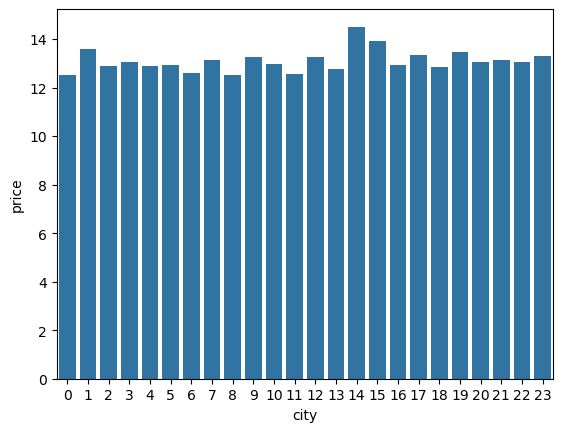

In [23]:
t_p = pd.concat([train[['city']], y], axis=1)
t_p.groupby('city').mean()
sns.barplot(data=t_p.groupby('city').mean(), x=t_p.groupby('city').mean().index, y='price')

## 모델 튜닝하기   



```markdown
# 필요한 라이브러리 불러오기
```

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

```markdown
# 랜덤 상태 설정(2020)
```

In [25]:
random_state=2020 

```markdown
# RMSE 매트릭 함수
 레이블인 y에 log변환을 해주었기 때문에, exp변환을 통해 본래 값으로 되돌려 놓는다.
```

In [26]:
def rmse(y_test, y_pred):   
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

```markdown
# 하이퍼 파라미터 최적화를 위한 함수
  
    1. GridSearchCV 모델로 `model`을 초기화.
    2. 모델을 학습.
    3. params, score에 각 조합에 대한 결과를 저장.
    4. 데이터 프레임을 생성 및 RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환.

```

In [27]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):

    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=verbose, n_jobs=n_jobs) 
    grid_model.fit(train, y) 
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    results = pd.DataFrame(params)
    results['score'] = score

    results['RMSLE'] = np.sqrt(-1 * results['score'])

    return results.sort_values(by='RMSLE')

```markdown
# 모델 생성
  LGBRegressor 모델을 위에서 설정한 random_state 값 '2020'로 생성
```

In [28]:
model = LGBMRegressor(random_state=random_state)

```markdown
# 하이퍼 파라미터 설정 및 결과 확인
```

In [29]:

param_grid = {
    'learning_rate': [0.01, 0.05],
    'max_depth': [10, 30],
    'n_estimators': [100, 1000]
}
"""


learning_rate	max_depth	n_estimators	score	RMSLE
7	0.05	30	1000	-0.025733	0.160415
5	0.05	10	1000	-0.025797	0.160614
3	0.01	30	1000	-0.026448	0.162629
1	0.01	10	1000	-0.026453	0.162643
6	0.05	30	100	-0.028611	0.169148
4	0.05	10	100	-0.028731	0.169501
0	0.01	10	100	-0.080758	0.284180
2	0.01	30	100	-0.080758	0.284180

"""
model = LGBMRegressor(random_state=random_state,force_row_wise=True)
gs_results = my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)
gs_results



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


,learning_rate,max_depth,n_estimators,score,RMSLE
7,0.05,30,1000,-0.025733,0.160415
5,0.05,10,1000,-0.025797,0.160614
3,0.01,30,1000,-0.026448,0.162629
1,0.01,10,1000,-0.026453,0.162643
6,0.05,30,100,-0.028611,0.169148
4,0.05,10,100,-0.028731,0.169501
0,0.01,10,100,-0.080758,0.284180
2,0.01,30,100,-0.080758,0.284180


```markdown
# 모델 훈련
  - 위 결과 중 최적 파라미터 적용으로 모델 생성
  - 모델 훈련
  - 예측값 생성
```

In [30]:
model = LGBMRegressor(learning_rate=0.05,
                      max_depth=30,
                      n_estimators=1000,
                      random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


array([13.11537431, 13.16441909, 14.10126323, ..., 13.06781962,
       12.71805283, 12.98923632])

## 결과 값 저장
  - 모델을 `train`, `y`로 학습.
  - test에 대해 예측.
  - 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 csv 파일을 저장.

In [31]:
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y) 
    y_pred = np.expm1(model.predict(test)) 

    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = y_pred

    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print(submission_csv_path)

# 제출 파일을 생성한다.
save_submission(model, train, y, test, 'lgbm', rmsle='0.160415')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
/Users/k.010k/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.160415.csv
